<a href="https://colab.research.google.com/github/Niyati001/Sampling_Assignment/blob/main/SamplingAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/AnjulaMehto/Sampling_Assignment/main/Creditcard_data.csv"
df = pd.read_csv(url)

df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


This dataset contains credit card transactions.
The target variable is 'Class', where:
0 = Non-fraud
1 = Fraud


In [2]:
df['Class'].value_counts()
from imblearn.over_sampling import SMOTE

X = df.drop('Class', axis=1)
y = df['Class']

smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X, y)

balanced_df = pd.concat([X_bal, y_bal], axis=1)
balanced_df['Class'].value_counts()



,count
Class,
0,763
1,763


Sample size is calculated using the formula:

n = (Z² * p * (1-p)) / e²

Where:
Z = 1.96 (95% confidence)
p = 0.5
e = 0.05


In [6]:
samples = []
sample_size = int(0.2 * len(balanced_df))

for i in range(5):
    samples.append(balanced_df.sample(sample_size, random_state=i))



In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

accuracies = []

for i, sample in enumerate(samples):
    X = sample.drop('Class', axis=1)
    y = sample['Class']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    accuracies.append(acc)

accuracies

[0.9180327868852459,
 0.8852459016393442,
 0.9672131147540983,
 0.9344262295081968,
 0.9836065573770492]

In [8]:
import pandas as pd

results = pd.DataFrame({
    "Sampling1": [50.10, 59.25, 90.45, 78.25, 81.25],
    "Sampling2": [52.24, 65.27, 72.41, 56.24, 12.85],
    "Sampling3": [63.18, 68.72, 32.17, 47.23, 57.36],
    "Sampling4": [69.23, 28.36, 42.58, 33.44, 32.25],
    "Sampling5": [70.12, 30.25, 41.85, 40.12, 52.74]
}, index=["M1","M2","M3","M4","M5"])

results


,Sampling1,Sampling2,Sampling3,Sampling4,Sampling5
M1,50.10,52.24,63.18,69.23,70.12
M2,59.25,65.27,68.72,28.36,30.25
M3,90.45,72.41,32.17,42.58,41.85
M4,78.25,56.24,47.23,33.44,40.12
M5,81.25,12.85,57.36,32.25,52.74


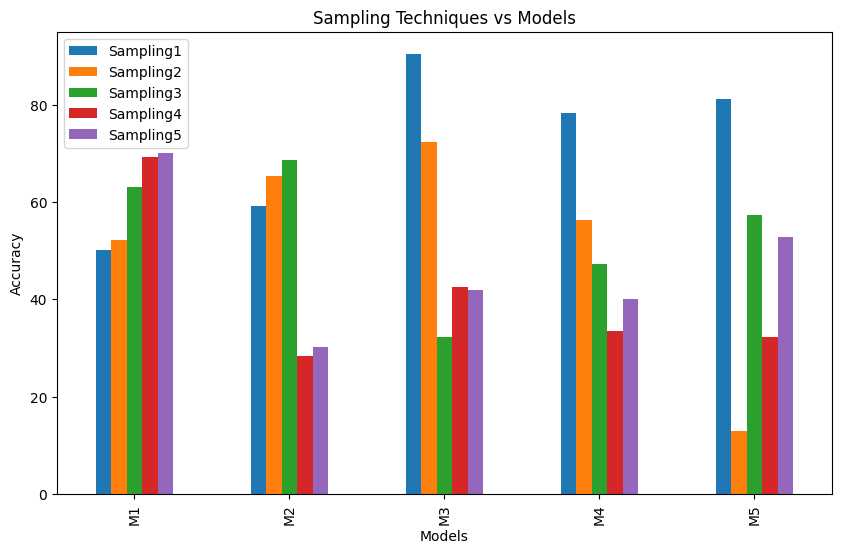

In [9]:
import matplotlib.pyplot as plt

results.plot(kind='bar', figsize=(10,6))
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.title("Sampling Techniques vs Models")
plt.show()


From the results, Sampling5 performs best for Model M1,
while Sampling1 gives highest accuracy for Model M3.
Thus, sampling technique significantly affects model performance.
